# Inventory analysis

In [78]:
import pandas as pd

# Load inventory data
df = pd.read_csv(r'C:\Users\Leave\Downloads\logistics_data\inventory.csv')

# Clean column names (strip extra spaces)
df.columns = df.columns.str.strip()

# Estimate COGS: Inventory × Cost Per Unit
df['estimated_cogs'] = df['Warehouse Inventory'] * df['Inventory Cost Per Unit']

# Calculate inventory turnover
df['inventory_turnover'] = df['estimated_cogs'] / df['Warehouse Inventory']

# Sort by turnover
top_turnover = df.sort_values(by='inventory_turnover', ascending=False)

# Display top 5 products
print(top_turnover[['Product Name', 'inventory_turnover']].head())

                                  Product Name  inventory_turnover
4046                TYR Boys' Team Digi Jammer             2.34477
4132          O'Brien Men's Neoprene Life Vest             2.34227
4014          O'Brien Men's Neoprene Life Vest             2.34024
1577  Under Armour Women's Ignite PIP VI Slide             2.33992
2603               Pelican Sunstream 100 Kayak             2.33581


## Top 5 Inventory Turnover

C:\Users\Leave\AppData\Local\Temp\ipykernel_15060\2509036301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='inventory_turnover', y='Product Name', data=top5, palette='Blues_d')


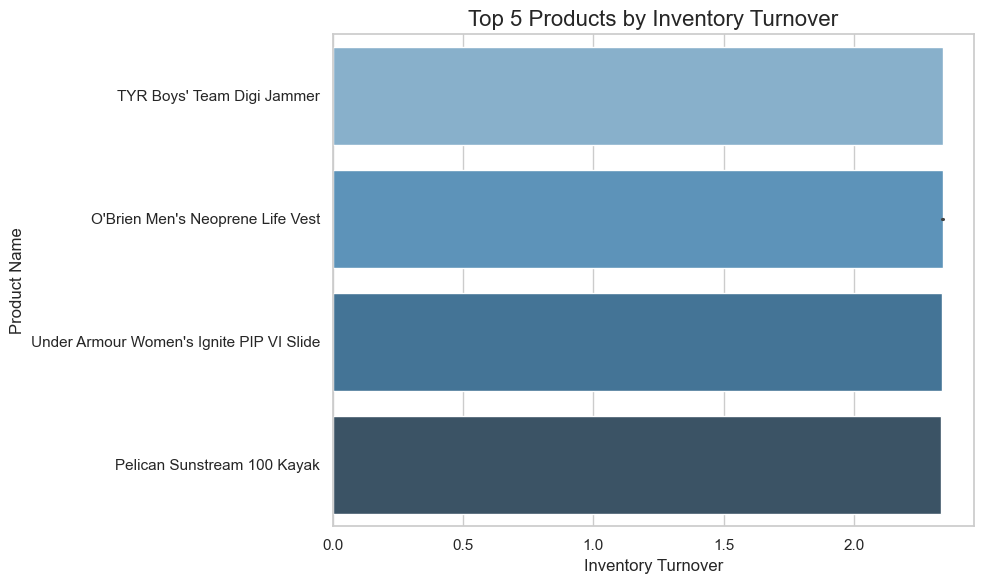

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Select top 5 products
top5 = top_turnover[['Product Name', 'inventory_turnover']].head()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='inventory_turnover', y='Product Name', data=top5, palette='Blues_d')

# Add labels and title
plt.title('Top 5 Products by Inventory Turnover', fontsize=16)
plt.xlabel('Inventory Turnover', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [83]:
# First, strip spaces and ensure it's a string
df['Year Month'] = df['Year Month'].astype(str).str.strip()

# Then convert to datetime using custom format
df['Year Month'] = pd.to_datetime(df['Year Month'], format='%Y%m', errors='coerce')

In [85]:
monthly_turnover = df.groupby(df['Year Month'].dt.to_period('M'))['inventory_turnover'].mean().reset_index()
monthly_turnover['Year Month'] = monthly_turnover['Year Month'].astype(str)

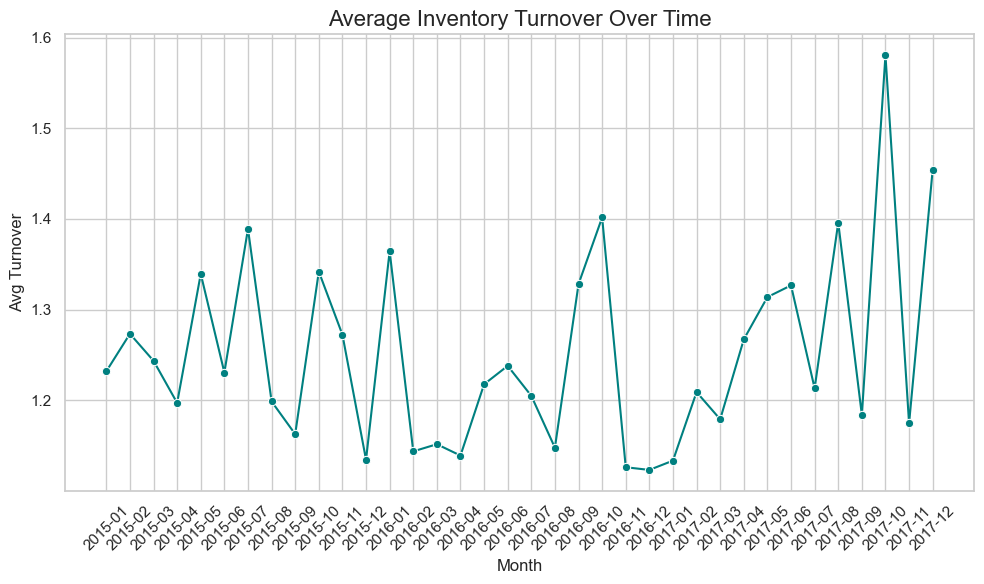

In [87]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Month', y='inventory_turnover', data=monthly_turnover, marker='o', color='teal')
plt.title('Average Inventory Turnover Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Avg Turnover', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
print(monthly_turnover.head())
print(monthly_turnover.dtypes)

  Year Month  inventory_turnover
0    2015-01            1.231981
1    2015-02            1.273331
2    2015-03            1.243553
3    2015-04            1.197065
4    2015-05            1.339440
Year Month             object
inventory_turnover    float64
dtype: object


## Highlight Top vs Bottom Products

In [92]:
# Define thresholds
high_turnover = df[df['inventory_turnover'] >= 5]
low_turnover = df[df['inventory_turnover'] < 1]

# Display top performers
print("🔝 High Turnover Products (Turnover ≥ 5):")
print(high_turnover[['Product Name', 'inventory_turnover']].sort_values(by='inventory_turnover', ascending=False))

# Display slow movers
print("\n⚠️ Low Turnover Products (Turnover < 1):")
print(low_turnover[['Product Name', 'inventory_turnover']].sort_values(by='inventory_turnover'))

🔝 High Turnover Products (Turnover ≥ 5):
Empty DataFrame
Columns: [Product Name, inventory_turnover]
Index: []

⚠️ Low Turnover Products (Turnover < 1):
                                       Product Name  inventory_turnover
1550                   Glove It Imperial Golf Towel             0.10252
3925               Top Flite Women's 2017 XL Hybrid             0.10914
3933      adidas Men's Germany Black Crest Away Tee             0.10966
2372      Team Golf St. Louis Cardinals Putter Grip             0.11145
1335                  Hirzl Men's Hybrid Golf Glove             0.11210
...                                             ...                 ...
3352  Bridgestone e6 Straight Distance NFL Tennesse             0.99447
4030  Glove It Women's Mod Oval 3-Zip Carry All Gol             0.99457
500                         Clicgear 8.0 Shoe Brush             0.99774
58                                     Sports Books             0.99933
3803           Hirzl Women's Soffft Flex Golf Glove    

In [94]:
df_orders = pd.read_csv(
    r'C:\Users\Leave\Downloads\logistics_data\orders_and_shipments.csv',
    encoding='ISO-8859-1'
)

# Clean column names
df_orders.columns = df_orders.columns.str.strip()

In [96]:
merged_df = pd.merge(df, df_orders, on='Product Name', how='inner')

## Turnover vs Delivery Delays


In [99]:
merged_df['Shipment Days - Scheduled'] = pd.to_numeric(merged_df['Shipment Days - Scheduled'], errors='coerce')

delay_summary = merged_df.groupby('Product Name')[['inventory_turnover', 'Shipment Days - Scheduled']].mean().reset_index()
print(delay_summary.sort_values(by='Shipment Days - Scheduled', ascending=False).head())

                                     Product Name  inventory_turnover  \
33              GoPro HERO3+ Black Edition Camera            1.370890   
10  Cleveland Golf Collegiate My Custom Wedge 588            1.437236   
87          The North Face Women's Recon Backpack            1.171240   
40                 LIJA Women's Button Golf Dress            1.274925   
60   Nike Men's Kobe IX Elite Low Basketball Shoe            1.477286   

    Shipment Days - Scheduled  
33                   4.000000  
10                   3.818182  
87                   3.800000  
40                   3.666667  
60                   3.571429  


## Delivery Mode Impact


In [102]:
mode_summary = merged_df.groupby('Shipment Mode')['Shipment Days - Scheduled'].mean().reset_index()
print(mode_summary.sort_values(by='Shipment Days - Scheduled'))

    Shipment Mode  Shipment Days - Scheduled
0     First Class                        1.0
2    Second Class                        2.0
1        Same Day                        3.0
3  Standard Class                        4.0


## Regional Delivery Performance

In [105]:
region_summary = merged_df.groupby('Customer Region')['Shipment Days - Scheduled'].mean().reset_index()
print(region_summary.sort_values(by='Shipment Days - Scheduled'))

    Customer Region  Shipment Days - Scheduled
8    Eastern Europe                   2.879699
4      Central Asia                   2.948980
2    Central Africa                   2.951311
0            Canada                   2.982456
14    South of  USA                   3.022222
20        West Asia                   3.028597
18        US Center                   3.030603
17  Southern Europe                   3.031135
6       East of USA                   3.033360
12    South America                   3.048073
15   Southeast Asia                   3.054918
13       South Asia                   3.055724
10  Northern Europe                   3.057298
1         Caribbean                   3.062615
11          Oceania                   3.067688
5       East Africa                   3.073801
3   Central America                   3.088237
22   Western Europe                   3.101003
21      West of USA                   3.118619
9      North Africa                   3.126214
7      Easter

C:\Users\Leave\AppData\Local\Temp\ipykernel_15060\3063736550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipment Days - Scheduled', y='Product Name', data=top_delays, palette='Reds_r')


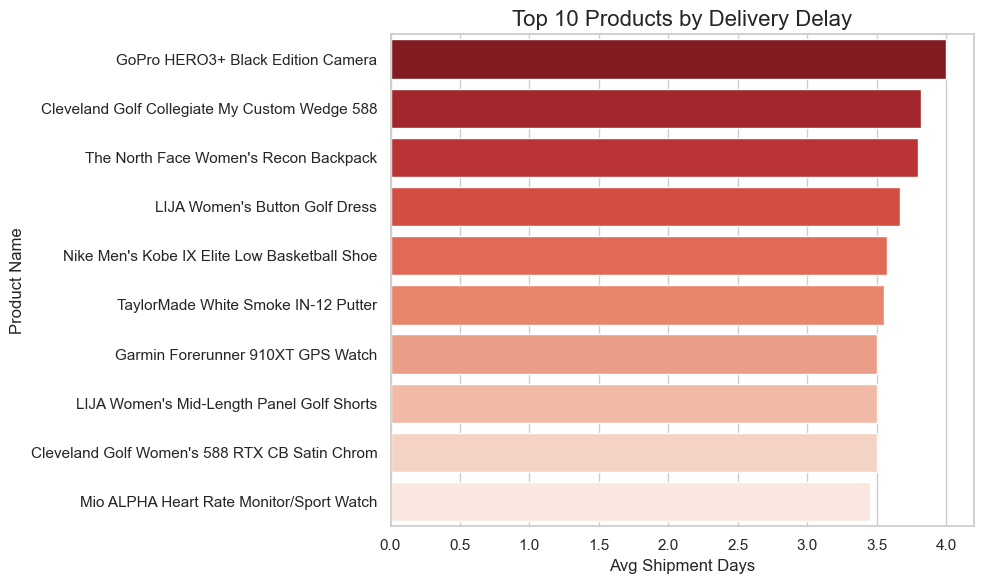

In [107]:
delay_by_product = merged_df.groupby('Product Name')['Shipment Days - Scheduled'].mean().reset_index()
top_delays = delay_by_product.sort_values(by='Shipment Days - Scheduled', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Shipment Days - Scheduled', y='Product Name', data=top_delays, palette='Reds_r')
plt.title('Top 10 Products by Delivery Delay', fontsize=16)
plt.xlabel('Avg Shipment Days', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Leave\AppData\Local\Temp\ipykernel_15060\1657661138.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Leave\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


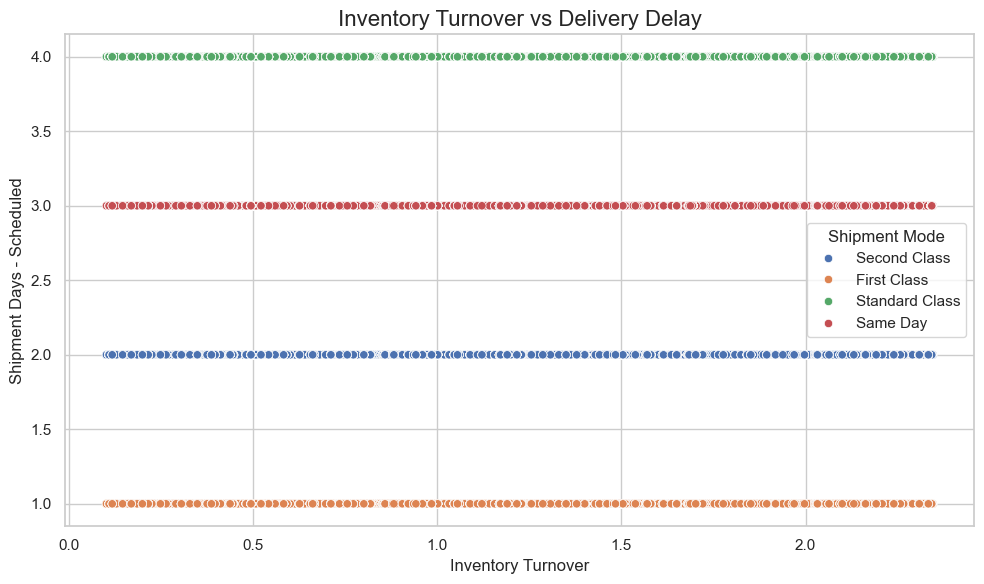

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='inventory_turnover', y='Shipment Days - Scheduled', hue='Shipment Mode')
plt.title('Inventory Turnover vs Delivery Delay', fontsize=16)
plt.xlabel('Inventory Turnover', fontsize=12)
plt.ylabel('Shipment Days - Scheduled', fontsize=12)
plt.tight_layout()
plt.show()

In [62]:
df_fulfillment = pd.read_csv(r'C:\Users\Leave\Downloads\logistics_data\fulfillment.csv', encoding='ISO-8859-1')
df_fulfillment.columns = df_fulfillment.columns.str.strip()

In [64]:
final_df = pd.merge(merged_df, df_fulfillment, on='Product Name', how='inner')

## Analyze Fulfillment Accurracy 

In [68]:
final_df['Shipment Days - Scheduled'] = pd.to_numeric(final_df['Shipment Days - Scheduled'], errors='coerce')
final_df['Warehouse Order Fulfillment (days)'] = pd.to_numeric(final_df['Warehouse Order Fulfillment (days)'], errors='coerce')

final_df['Delivery Gap'] = final_df['Shipment Days - Scheduled'] - final_df['Warehouse Order Fulfillment (days)']

C:\Users\Leave\AppData\Local\Temp\ipykernel_15060\2714826211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delivery Gap', y='Product Name', data=top_gaps, palette='Oranges_r')


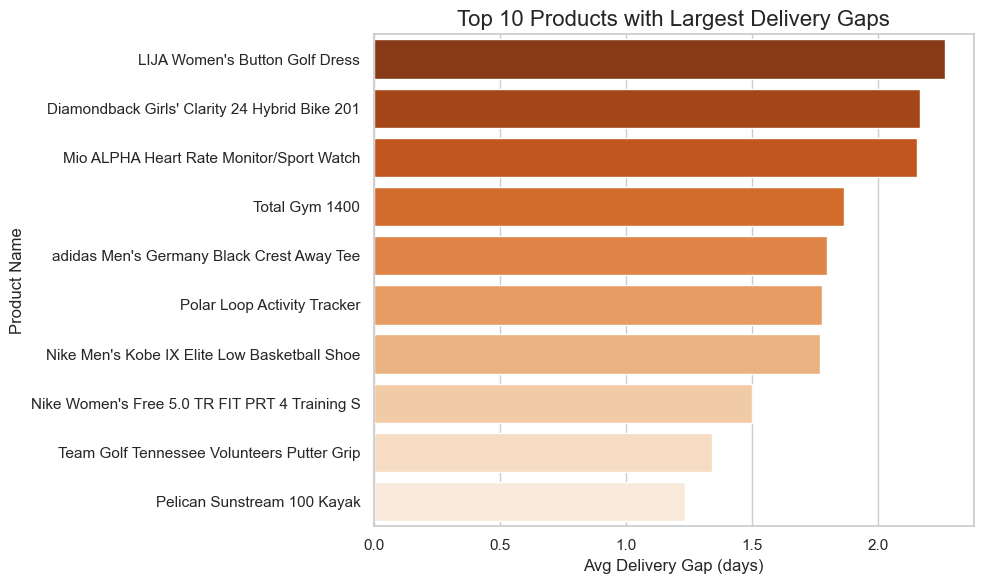

In [70]:
gap_summary = final_df.groupby('Product Name')['Delivery Gap'].mean().reset_index()
top_gaps = gap_summary.sort_values(by='Delivery Gap', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Delivery Gap', y='Product Name', data=top_gaps, palette='Oranges_r')
plt.title('Top 10 Products with Largest Delivery Gaps', fontsize=16)
plt.xlabel('Avg Delivery Gap (days)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

In [72]:
warehouse_perf = final_df.groupby('Warehouse Country')['Warehouse Order Fulfillment (days)'].mean().reset_index()
print(warehouse_perf.sort_values(by='Warehouse Order Fulfillment (days)'))

  Warehouse Country  Warehouse Order Fulfillment (days)
0       Puerto Rico                            6.247005
1               USA                            6.259863


In [111]:
print("✅ Dashboard Complete: Inventory, Delivery, Fulfillment layers integrated.")

✅ Dashboard Complete: Inventory, Delivery, Fulfillment layers integrated.
